## **Web scraping to gain company insights**



## Contents

#### 1. Introduction

#### 2. Data Collection

#### 3. Text Mining
    3.1 Data Cleaning
    3.2 Stemming
    
#### 4. Data Analysis
    4.1 Frequency Analysis
    4.2 Word Cloud on Corpus
    4.3 Topic Modelling
    4.4 Sentiment Analysis
    
#### 5. Results & Conclusion

***

### 1. Introduction

Scraping and analysing customer review data to uncover findings for British Airways. In this notebook, we will scrape reviews on British Airways from the Skytrax website, clean the collected data, and perform data analyses on it. We will use techniques such as topic modelling and sentiment analysis to uncover insights about what customers find important when flying with British Airways.


***

### 2. Data Collection

In [1]:
# package to collect web data 
import requests
from bs4 import BeautifulSoup

# packages to store and manipulate data
import pandas as pd
import numpy as np

# plotting packages
import matplotlib.pyplot as plt
import seaborn as sns

# model building package
import sklearn

# library to clean text
import re

#!pip install wordcloud
import wordcloud
from wordcloud import WordCloud

# packages for natural language processing
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer

# Importing Gensim - handles text data
import gensim
from gensim import corpora

import vaderSentiment
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

import textblob
from textblob import TextBlob

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Anisah\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


The code below is used for the data collection, which was sourced from: https://www.theforage.com/modules/NjynCWzGSaWXQCxSX/X839TXojBwiHpC5va?ref=MpCsFqPdR4z5g7bT8. 

In [2]:
base_url = "https://www.airlinequality.com/airline-reviews/british-airways"

# how many pages we will scrape:
pages = 10 
# how many reviews per page we will scrape:
page_size = 100

# we will store the scraped reviews in a list named 'reviews'
reviews = []

# for i in range(1, pages + 1):
for i in range(1, pages + 1):

    print(f"Scraping page {i}")

    # Create URL to collect links from paginated data
    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"

    # Collect HTML data from this page
    response = requests.get(url)

    # Parse content
    content = response.content
    parsed_content = BeautifulSoup(content, 'html.parser')
    for para in parsed_content.find_all("div", {"class": "text_content"}):
        reviews.append(para.get_text())
    
    print(f"   ---> {len(reviews)} total reviews")

Scraping page 1
   ---> 100 total reviews
Scraping page 2
   ---> 200 total reviews
Scraping page 3
   ---> 300 total reviews
Scraping page 4
   ---> 400 total reviews
Scraping page 5
   ---> 500 total reviews
Scraping page 6
   ---> 600 total reviews
Scraping page 7
   ---> 700 total reviews
Scraping page 8
   ---> 800 total reviews
Scraping page 9
   ---> 900 total reviews
Scraping page 10
   ---> 1000 total reviews


* Creating a dataframe from the scraped reviews:

In [3]:
df = pd.DataFrame()
df["reviews"] = reviews
df.head()

,reviews
0,✅ Trip Verified | Check in agent at LHR was ve...
1,✅ Trip Verified | Very disappointing. I book ...
2,✅ Trip Verified | Excellent service both on th...
3,✅ Trip Verified | Good lounge at Cape Town. O...
4,✅ Trip Verified | A really excellent journey....


* Converting the dataframe to a .csv file *'BA_reviews.csv'*

In [4]:
df.to_csv("data/BA_reviews.csv")

***

### 3. Text Mining

We now are going to prepare our dataset, as it is messy and contains purely text. We will perform data cleaning and stemming. Once our data is cleaned and mined, we can then perform analyses, which will be done in Section 4.

#### 3.1 Data Cleaning

In this sub-section, we will be:

* Removing the *'Not Verified |'* and *'✅ Trip Verified |'* strings from the reviews, as they are unneccessary for this task.
* Making all the text in the reviews lowercase.
* Removing non-alphanumeric characters.

In [5]:
df['reviews'] = df['reviews'].str.strip('Not Verified')
df['reviews'] = df['reviews'].str.strip('✅ Trip Verified')
df['reviews'] = df['reviews'].str.strip('|')

df['reviews'] = df['reviews'].str.lower()

df.reviews.replace({r'[^a-zA-Z]+':' '}, regex=True, inplace=True)

df

,reviews
0,check in agent at lhr was very helpful and fr...
1,very disappointing i book ba so i can fly dur...
2,excellent service both on the ground and on b...
3,good lounge at cape town on time departure dr...
4,a really excellent journey lounge not overcro...
...,...
995,london to sao paulo overnight club world flig...
996,worst ba flight ever flew tampa to london gat...
997,flew british airways from london heathrow to ...
998,madrid to london the main plus about this fli...


#### 3.2 Stemming

The cell below will loop through all 1000 reviews, take the Porter Stemmed version of each word in each review, and append the new clean and stemmed reviews to an empty array, named `corpus`.

In [6]:
# initializing empty array to append clean text
corpus = []
 
# 1000 (reviews) rows to clean
for i in range(0, 1000):
     
    review = df['reviews'][i]
    
    # split to array (default delimiter is " ")
    review = review.split()
     
    # creating PorterStemmer object to take main stem of each word
    ps = PorterStemmer()
     
    # loop for stemming each word in string array at ith row   
    review = [ps.stem(word) for word in review
                if not word in set(stopwords.words('english'))]
                 
    # rejoin all string array elements to create back into a string
    review = ' '.join(review) 
     
    # append each string to create array of clean text
    corpus.append(review)

Converting `corpus` data (currently in a list) into a dataframe:

In [7]:
corpus_df = pd.DataFrame (corpus, columns = ['reviews'])
print(corpus_df)

                                               reviews
0    check agent lhr help friendli flight crew seat...
1    disappoint book ba fli day return flight pm ca...
2    excel servic ground board first class product ...
3    good loung cape town time departur drink high ...
4    realli excel journey loung overcrowd late afte...
..                                                 ...
995  london sao paulo overnight club world flight p...
996  worst ba flight ever flew tampa london gatwick...
997  flew british airway london heathrow dusseldorf...
998  madrid london main plu flight cabin crew profe...
999  london moscow british airway downgrad plane sm...

[1000 rows x 1 columns]


***

### 4. Data Analysis

#### 4.1 Frequency Analysis

In [8]:
top_review_terms = corpus_df.reviews.str.split(expand=True).stack().value_counts()

review_terms_df = pd.DataFrame (top_review_terms, columns = ['terms'])
review_terms_df

,terms
flight,2040
ba,1214
seat,1084
servic,759
london,678
...,...
fo,1
advisori,1
compli,1
fund,1


* Services provided the airline are important to customers as keywords include: 'flight', 'seat', 'service', 'time', 'food', 'crew', and 'class'. 

#### 4.2 Word Cloud

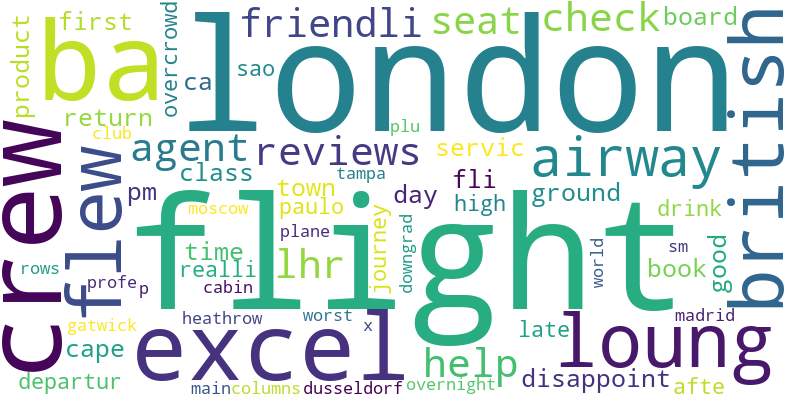

In [9]:
# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=5000, 
                      contour_width=3, contour_color='steelblue', width=800, 
                      height=400)

# Generate a word cloud
wordcloud.generate(str(corpus_df))

# Visualize the word cloud
wordcloud.to_image()

From the wordcloud, we can see that some of the most common (and hence most important) words from reviews:

* flight
* london
* crew
* british
* lounge
* flew
* time
* excel

From this, we can gauge an idea of what customers value.


#### 4.3 Topic Modelling

* We will use the Latent Dirichlet Allocation, but could also use TF and IDF, or Non Negative Matrix Factorization. 
* We convert the corpus to a matrix representation, in this way we can run mathematical models on it.
* We are going to use the gensim library to handle the text data and convert the corpus into a document-term matrix.
* When our document-term matrix has been created, we create an object and train it on the document-term matrix to run the LDA model.


(Code sourced from: https://www.analyticsvidhya.com/blog/2016/08/beginners-guide-to-topic-modeling-in-python/)

In [10]:
# splits each term up in each review
corp_array = [review.split() for review in corpus]

# creates term dictionary of our corpus - every unique term is assigned an index. 
dictionary = corpora.Dictionary(corp_array)

# converts list of docs (corpus) into Document Term Matrix using 'dictionary' prepared above.
doc_term_matrix = [dictionary.doc2bow(review) for review in corp_array]

# creating the object for LDA model using gensim library
lda = gensim.models.ldamodel.LdaModel

# running and training LDA model on the document-term matrix.
ldamodel = lda(doc_term_matrix, num_topics=6, id2word = dictionary, passes=50)

print(ldamodel.print_topics(num_topics=6, num_words=6))

[(0, '0.029*"flight" + 0.024*"ba" + 0.016*"book" + 0.013*"custom" + 0.012*"call" + 0.011*"cancel"'), (1, '0.034*"flight" + 0.018*"seat" + 0.016*"ba" + 0.009*"time" + 0.009*"servic" + 0.008*"london"'), (2, '0.023*"flight" + 0.011*"crew" + 0.009*"british" + 0.009*"airway" + 0.009*"servic" + 0.008*"london"'), (3, '0.033*"flight" + 0.019*"bag" + 0.018*"london" + 0.018*"hour" + 0.016*"delay" + 0.014*"arriv"'), (4, '0.019*"flight" + 0.019*"seat" + 0.014*"ba" + 0.013*"class" + 0.013*"food" + 0.013*"servic"'), (5, '0.029*"seat" + 0.021*"flight" + 0.018*"board" + 0.017*"check" + 0.010*"ba" + 0.008*"passeng"')]


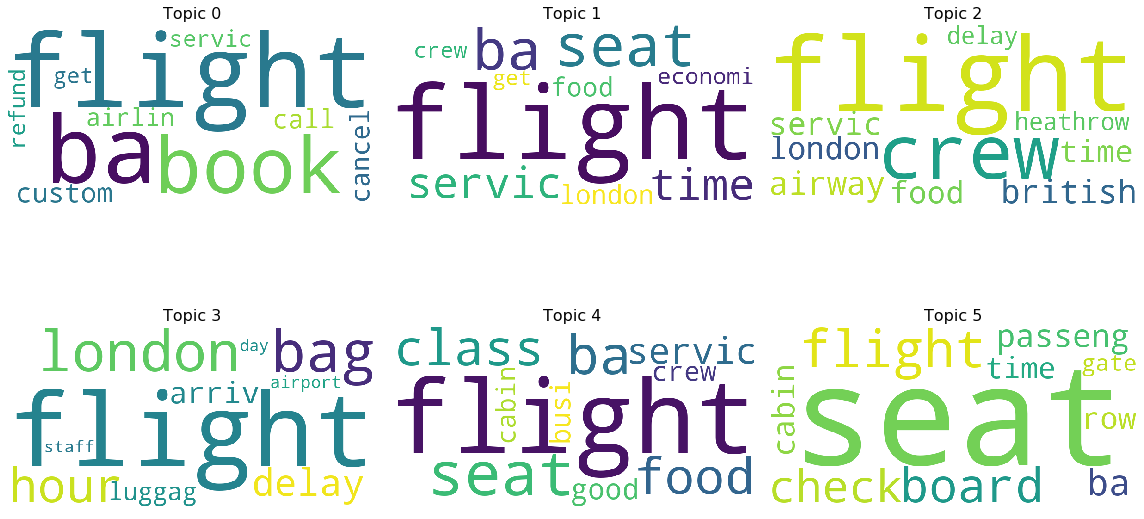

In [11]:
topics = ldamodel.show_topics(formatted=False)

fig, axes = plt.subplots(2, 3, figsize=(16,10), sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):
    fig.add_subplot(ax)
    topic_words = dict(topics[i][1])
    wordcloud.generate_from_frequencies(topic_words, max_font_size=300)
    plt.gca().imshow(wordcloud)
    plt.gca().set_title('Topic ' + str(i), fontdict=dict(size=16))
    plt.gca().axis('off')


plt.subplots_adjust(wspace=0, hspace=0)
plt.axis('off')
plt.margins(x=0, y=0)
plt.tight_layout()
plt.show()


#### 4.4 Sentiment Analysis

***VADER SENTIMENT***

In [12]:
sent_analyzer = SentimentIntensityAnalyzer()

def vaderAnalysis(vader_dict):
    
    polarity = "Neutral"

    if vader_dict['compound'] <= -0.05:
        return 'Negative'
    elif vader_dict['compound'] >= 0.05:
        return 'Positive'
    else:
        return 'Neutral'
    
def vaderPredicts(review):
    
    vader_dict = sent_analyzer.polarity_scores(review)
    return vaderAnalysis(vader_dict)
    

corpus_df['vader_analysis'] = corpus_df['reviews'].apply(vaderPredicts)

In [13]:
vader_value_counts = corpus_df['vader_analysis'].value_counts()
vader_value_counts

Positive    639
Negative    329
Neutral      32
Name: vader_analysis, dtype: int64

([<matplotlib.patches.Wedge at 0x1879885b0c8>,
 [Text(-0.46522805231423714, 0.9967762333341931, 'Positive'),
  Text(0.36284093456627897, -1.0384346181647979, 'Negative'),
  Text(1.0944461155682348, -0.11039791717963877, 'Neutral')],
 [Text(-0.2537607558077657, 0.5436961272731962, '63.9%'),
  Text(0.19791323703615213, -0.5664188826353442, '32.9%'),
  Text(0.5969706084917643, -0.06021704573434841, '3.2%')])

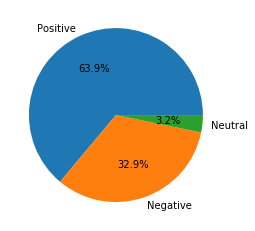

In [14]:
counts = vader_value_counts.to_numpy()
labels =["Positive", "Negative", "Neutral"]
plt.pie(counts, labels = labels, autopct="%1.1f%%")

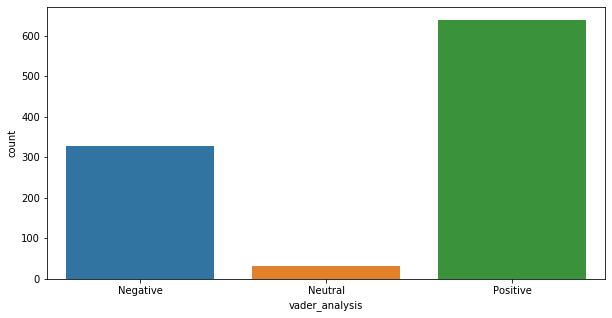

In [15]:
fig, ax = plt.subplots(figsize=(10,5))
sns.countplot(x=corpus_df["vader_analysis"])

*Word Cloud on Positive and Negative Sentiments - VADER*

In [16]:
flight_stopwords=stopwords.words('english')
flight_stopwords.extend(["british","ba", "airways", "fly", "flight", "Positive", "Negative", "vader_analysis", 'airway', 'ever'])

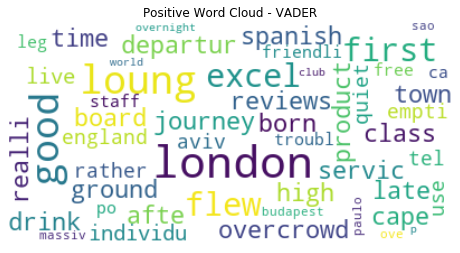

In [17]:
pos=corpus_df[corpus_df["vader_analysis"]=="Positive"]

wc=WordCloud(background_color='white', max_words=50, max_font_size=40, random_state=0, stopwords=flight_stopwords).generate(str(pos))

fig = plt.figure(1, figsize=(8, 8))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.title('Positive Word Cloud - VADER')
plt.show()

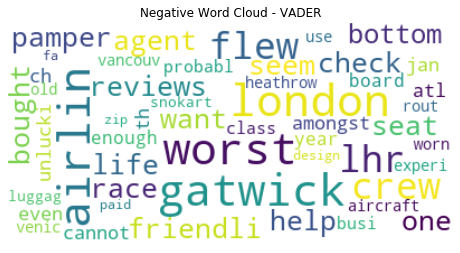

In [18]:
neg=corpus_df[corpus_df["vader_analysis"]=="Negative"]

wc=WordCloud(background_color='white', max_words=50, max_font_size=40, random_state=0, stopwords=flight_stopwords).generate(str(neg))

fig = plt.figure(1, figsize=(8, 8))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.title('Negative Word Cloud - VADER')
plt.show()

***TEXT BLOB***

TextBlob returns polarity and subjectivity as outputs.

* *Polarity* - determines the sentiment of the text, measured between -1 and 1. -1 denotes a highly negative sentiment and 1 denotes a highly positive sentiment.
* *Subjectivity* - whether the text is factual or opinion-based. Measure is between 0 and 1, where a value closer to 0 is more objective and a value closer to 1 is more subjective.

In [19]:
corpus_df['textblob_subjectivity'] = corpus_df['reviews'].apply(lambda review: TextBlob(review).sentiment.subjectivity)
corpus_df['textblob_polarity'] = corpus_df['reviews'].apply(lambda review: TextBlob(review).sentiment.polarity)
corpus_df.head()

,reviews,vader_analysis,textblob_subjectivity,textblob_polarity
0,check agent lhr help friendli flight crew seat...,Negative,0.571429,0.021429
1,disappoint book ba fli day return flight pm ca...,Neutral,0.595833,-0.037500
2,excel servic ground board first class product ...,Positive,0.295833,0.337500
3,good loung cape town time departur drink high ...,Positive,0.628000,0.272000
4,realli excel journey loung overcrowd late afte...,Positive,0.359192,0.211313


In [20]:
corpus_df['textblob_sentiment']=''

corpus_df.loc[corpus_df.textblob_polarity>0,'textblob_sentiment']='Positive'
corpus_df.loc[corpus_df.textblob_polarity==0,'textblob_sentiment']='Neutral'
corpus_df.loc[corpus_df.textblob_polarity<0,'textblob_sentiment']='Negative'

([<matplotlib.patches.Wedge at 0x1879a0b1c88>,
 [Text(-0.5923243322469792, 0.9269044640242977, 'Positive'),
  Text(0.4839330276496009, -0.9878303623344905, 'Negative'),
  Text(1.0929724305533868, -0.12414212037105832, 'Neutral')],
 [Text(-0.32308599940744315, 0.5055842531041623, '68.1%'),
  Text(0.26396346962705497, -0.5388165612733584, '28.3%'),
  Text(0.5961667803018472, -0.06771388383875908, '3.6%')])

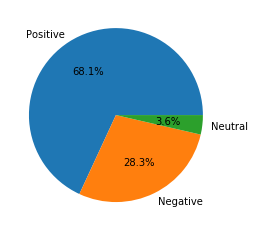

In [21]:
tb_value_counts = corpus_df['textblob_sentiment'].value_counts()
counts = tb_value_counts.to_numpy()
labels =["Positive", "Negative", "Neutral"]
plt.pie(counts, labels = labels, autopct="%1.1f%%")

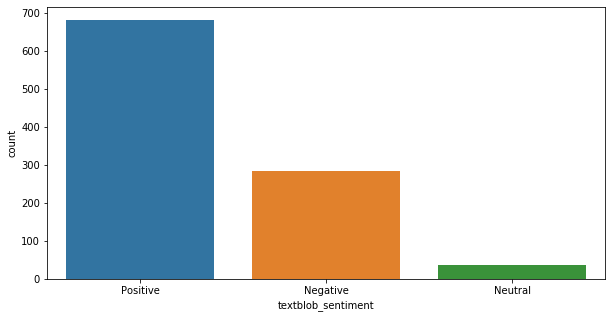

In [22]:
fig, ax = plt.subplots(figsize=(10,5))
sns.countplot(x=corpus_df['textblob_sentiment'])

*Word Cloud on Positive and Negative Sentiments - Text Blob*

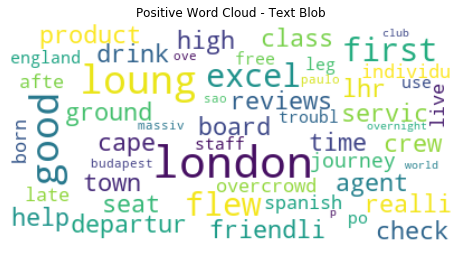

In [23]:
pos=corpus_df[corpus_df["textblob_sentiment"]=="Positive"]

wc=WordCloud(background_color='white', max_words=50, max_font_size=40, random_state=0, stopwords=flight_stopwords).generate(str(pos))

fig = plt.figure(1, figsize=(8, 8))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.title('Positive Word Cloud - Text Blob')
plt.show()

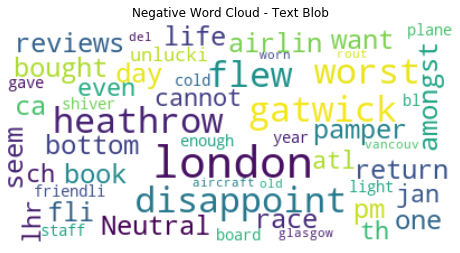

In [24]:
neg=corpus_df[corpus_df["textblob_sentiment"]=="Negative"]

wc=WordCloud(background_color='white', max_words=50, max_font_size=40, random_state=0, stopwords=flight_stopwords).generate(str(neg))

fig = plt.figure(1, figsize=(8, 8))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.title('Negative Word Cloud - Text Blob')
plt.show()

***

### 5. Results & Conclusion

The frequency analysis and word cloud are useful to get an overall indication of what words are most prominent in the corpus, and hence which are most important and valuable to customers of British Airways. We then were able to use the LDA for topic modelling, which helped to categorise the words into six topics, from which we can infer a theme of each. 

We then used VADER and Text Blob to get an indication of the sentiments, whether they were positive, negative or neutral in the reviews. We visualized these using pie charts, bar graphs and word clouds. Out of the 1000 reviews we analysed, the majority were positive (63.9% from VADER analysis, 68.1% from Text Blob), with positive keywords being related to 'london', 'lounge', 'class', and 'journey'. The negative reviews (32.9% VADER, 28.3% Text Blob) tend to include keywords such as: 'gatwick', 'seat', 'race', and 'crew'. 

Themes can be picked out from these analyses and can be used to improve services in the future.